# Experiment 5: Dimensionality Reduction through PCA

Apply PCA on the Fisherâ€™s Iris data set. The data contains 3 classes of 50 instances each, where each class refers to a type of iris plant. There are 4 different attributes describing the data. You will use principal component analysis to transform the data to a lower dimensional space.

## Import Libraries

Load all relevant packages and dataset.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

## Import Dataset

In [2]:
df=pd.read_csv("Data\\iris.csv")
df.head()

sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

In [3]:
df.isna().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [4]:
df.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

## Splitting Features Vectors and Labels

Split feature vectors and labels.

In [5]:
x=df.iloc[:,0:4]
y=df.iloc[:,-1]

## Normalization of Dataset

Normalize the dataset which is done by subtracting the mean of each feature vector from the dataset so that the dataset should be centered on the origin.

In [6]:
(x["sepal.length"].mean(),x["sepal.width"].mean(),x["petal.length"].mean(),x["petal.length"].mean())

(5.843333333333334, 3.0573333333333337, 3.7580000000000005, 3.7580000000000005)

In [7]:
x1=x.copy()
x1=x1-x1.mean()
x1.head()

sepal.length  sepal.width  petal.length  petal.width
0     -0.743333     0.442667        -2.358    -0.999333
1     -0.943333    -0.057333        -2.358    -0.999333
2     -1.143333     0.142667        -2.458    -0.999333
3     -1.243333     0.042667        -2.258    -0.999333
4     -0.843333     0.542667        -2.358    -0.999333

Another method is by using standard scaler

In [8]:
scaler=StandardScaler()
x[["sepal.length","sepal.width","petal.length","petal.width"]]=scaler.fit_transform(x[["sepal.length","sepal.width","petal.length","petal.width"]])
x.head()

sepal.length  sepal.width  petal.length  petal.width
0     -0.900681     1.019004     -1.340227    -1.315444
1     -1.143017    -0.131979     -1.340227    -1.315444
2     -1.385353     0.328414     -1.397064    -1.315444
3     -1.506521     0.098217     -1.283389    -1.315444
4     -1.021849     1.249201     -1.340227    -1.315444

## Covariance Matrix 

In [9]:
x_cov=x.cov()
x_cov

sepal.length  sepal.width  petal.length  petal.width
sepal.length      1.006711    -0.118359      0.877604     0.823431
sepal.width      -0.118359     1.006711     -0.431316    -0.368583
petal.length      0.877604    -0.431316      1.006711     0.969328
petal.width       0.823431    -0.368583      0.969328     1.006711

## Eigen Values and Eigen Vectors

Calculate the eigenvalues and eigenvectors. 


*Remember:*
The Eigenvectors of the Covariance matrix we get are Orthogonal to each other and each vector represents a principal axis. A higher Eigenvalue corresponds to a higher variability. Hence the principal axis with the higher Eigenvalue will be an axis capturing higher variability in the data. Orthogonal means the vectors are mutually perpendicular to each other.


In [10]:
values,vectors=np.linalg.eigh(x_cov)
values,vectors

(array([0.02085386, 0.14774182, 0.9201649 , 2.93808505]),
 array([[ 0.26128628,  0.71956635,  0.37741762, -0.52106591],
        [-0.12350962, -0.24438178,  0.92329566,  0.26934744],
        [-0.80144925, -0.14212637,  0.02449161, -0.5804131 ],
        [ 0.52359713, -0.63427274,  0.06694199, -0.56485654]]))

## Sorting the Eigen values

Sort the eigen values in descending order. 


Remember: We order the eigenvalues from largest to smallest so that it gives us the components in order of significance. Each column in the Eigen vector-matrix corresponds to a principal component, so arranging them in descending order of their Eigenvalue will automatically arrange the principal component in descending order of their variability. Hence, the first column in our rearranged Eigen vector-matrix here will be a principal component that captures the highest variability. 


In [11]:
index=values.argsort()[::-1]
index

array([3, 2, 1, 0], dtype=int64)

sorting according to the index order

In [12]:
values=values[index]
vectors=vectors[:,index]
values,vectors

(array([2.93808505, 0.9201649 , 0.14774182, 0.02085386]),
 array([[-0.52106591,  0.37741762,  0.71956635,  0.26128628],
        [ 0.26934744,  0.92329566, -0.24438178, -0.12350962],
        [-0.5804131 ,  0.02449161, -0.14212637, -0.80144925],
        [-0.56485654,  0.06694199, -0.63427274,  0.52359713]]))

## Using PCA

In [13]:
pca=PCA(n_components=2)
x_pca=pca.fit(x)
eigenvector_subset = pca.components_.transpose()[:, :2]
eigenvector_subset

array([[ 0.52106591,  0.37741762],
       [-0.26934744,  0.92329566],
       [ 0.5804131 ,  0.02449161],
       [ 0.56485654,  0.06694199]])

Transform the data by having a dot product between the Transpose of the Feature Vector and the Transpose of the mean-centered data. By transposing the outcome of the dot product, the result we get is the data reduced to lower dimensions (2-D) from higher dimensions (4-D).

In [14]:
x_reduced=np.dot(eigenvector_subset.transpose(),  x.transpose()).transpose()
x_reduced

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

## Ploting Principle Components

Project the data onto its first two principal components and plot the results using the seaborn and matplotlib libraries. (Hint: Create Data Frame of reduced dataset and concatenate it with Labels (target variable) to create a complete Dataset).

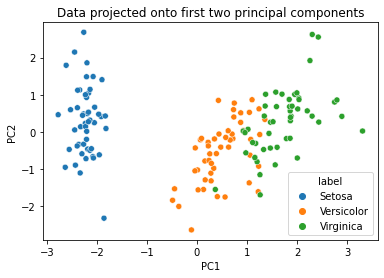

In [15]:
# Create a dataframe of the reduced dataset and concatenate it with the labels
df_reduced = pd.DataFrame(x_reduced, columns=['PC1', 'PC2'])
df_reduced['label'] = y

# Plot the results using seaborn and matplotlib
sns.scatterplot(x='PC1', y='PC2', hue='label', data=df_reduced)
plt.title('Data projected onto first two principal components')
plt.show()